# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.4201868760760323, performing 40.9 it/sec
Step 100: Loss = 0.6947743228733783, performing 55.4 it/sec
Step 200: Loss = 0.2687689680563123, performing 57.6 it/sec
Step 300: Loss = 0.0919883748154638, performing 69.5 it/sec
Step 400: Loss = 0.0082428204604285, performing 88.0 it/sec
No improvement since Step 383, early stopping.
[Best]  Step 382: Loss = 0.0075321756762347
[Final] Step 432: Loss = 0.0099740462150369

predicted end states
------------------------------------
         5th       Mean      95th
RISA-1  3.00e-02  3.00e-02  3.00e-02
RISA-2  2.44e-10  2.49e-10  2.55e-10
RISA-3  2.18e-10  2.22e-10  2.27e-10
RISA-4  9.85e-12  1.00e-11  1.02e-11
RISA-5  1.67e-11  1.71e-11  1.74e-11
RISA-6  1.42e-07  1.42e-07  1.42e-07
RISA-7  2.80e-10  2.80e-10  2.80e-10
RISA-8  1.01e-07  1.01e-07  1.01e-07


predicted conditional events
-----

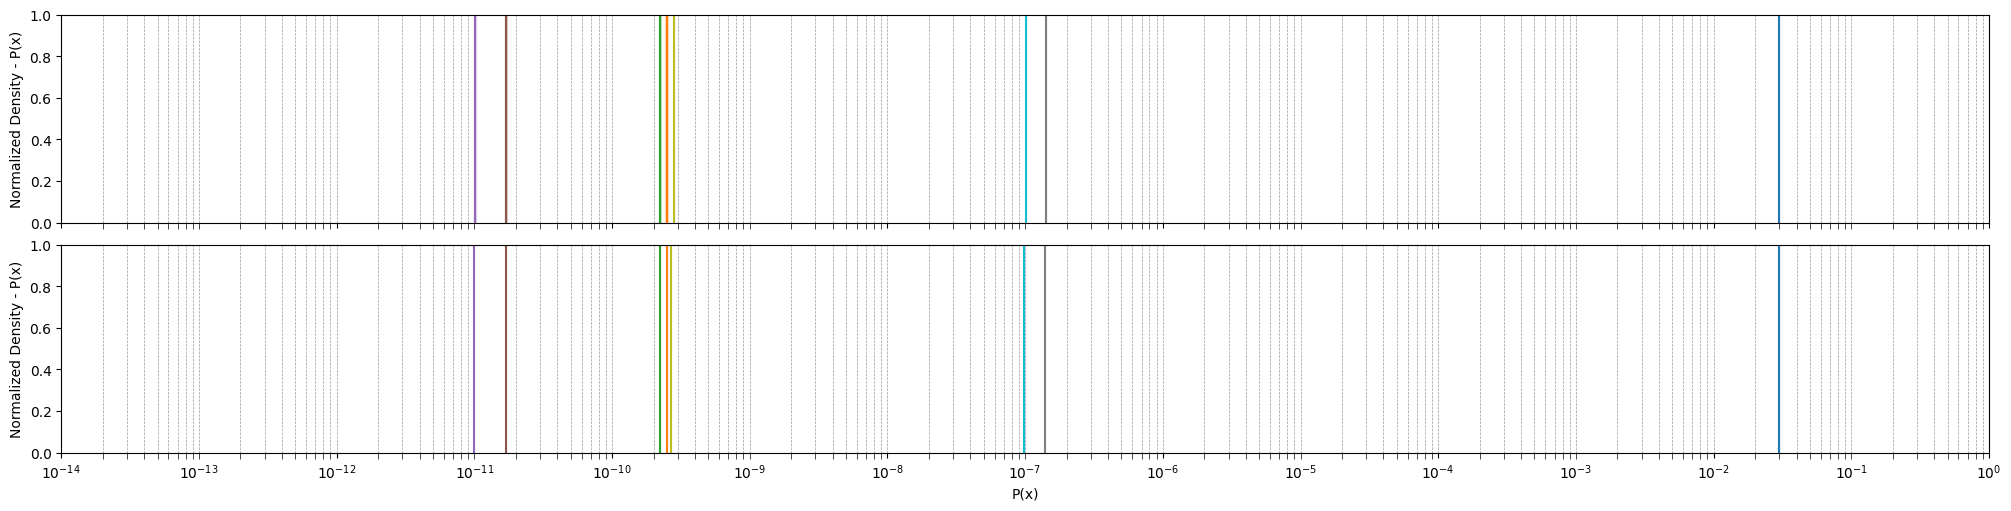

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 3.0e-2,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['RISA', 'RSIG', 'RROD', 'PRUN', 'BPHR', 'DHRS', 'DHRL|~BPHR', 'DHRL|~DHRS|BPHR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {

    'RISA-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 0, np.nan],
        'probability': 3.0e-2,
    },
    'RISA-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 1, np.nan],
        'probability': 2.5e-10,
    },
    'RISA-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 0],
        'probability': 2.23e-10,
    },
    'RISA-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 1],
        'probability': 1e-11,
    },
    'RISA-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan],
        'probability': 1.7e-11,
    },
    'RISA-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.4e-7,
    },
    'RISA-7': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 2.7e-10,
    },
    'RISA-8': {
        'sequence': [1, 1,np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 9.8e-8,

    },


}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)